<a href="https://colab.research.google.com/github/AadarshLN/Audio-Classification-in-Carnatic-Classical-Music/blob/main/CNN_MINI_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import librosa
import os
from PIL import Image
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!fusermount -u drive
!google-drive-ocamlfuse drive


Mounted at /content/gdrive
fusermount: failed to unmount /content/drive: No such file or directory
/bin/bash: line 1: google-drive-ocamlfuse: command not found


In [ ]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(1292, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Use 'same' padding here to keep the spatial dimensions
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(1292, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Use 'same' padding here to keep the spatial dimensions
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
#need to split the iomages into train and validation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=20,       # Rotate images by up to 20 degrees
    width_shift_range=0.2,   # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    horizontal_flip=True,
    # Flip images horizontally
)


train_generator = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/datasets/Paper_2_implementation_graphs',
    target_size=(1292, 32),
    batch_size=64,
    class_mode='sparse',  # Use 'sparse' if your labels are integers
    subset='training'
)

# Create the validation set
validation_generator = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/datasets/Paper_2_implementation_graphs',
    target_size=(1292, 32),
    batch_size=64,
    class_mode='sparse',
    subset='validation'
)

Found 48 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model1.compile(optimizer='Nadam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history1 = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=[early_stopping]
)

loss, accuracy = model1.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.6042 - loss: 0.6857 - val_accuracy: 0.6000 - val_loss: 10.0361
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5833 - loss: 9.8016 - val_accuracy: 0.4000 - val_loss: 4.7598
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4167 - loss: 4.3459 - val_accuracy: 0.4000 - val_loss: 0.9917
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4167 - loss: 0.9734 - val_accuracy: 0.6000 - val_loss: 0.6800
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5833 - loss: 0.6689 - val_accuracy: 0.5500 - val_loss: 0.7014
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5833 - loss: 0.6601 - val_accuracy: 0.5500 - val_loss: 0.6991
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step - accuracy: 0.5833 - loss: 0.6633 - val_accuracy: 0.6000 - val_loss: 0.7012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.5500 - loss: 0.6928
Validation accuracy: 0.550000011920929


In [ ]:
model2.compile(optimizer='RMSProp',
              loss='binary_crossentropy',
              metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history2 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=[early_stopping]
)

loss, accuracy = model2.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5833 - loss: 0.6821 - val_accuracy: 0.6000 - val_loss: 7.0064
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step - accuracy: 0.5833 - loss: 6.9710 - val_accuracy: 0.4000 - val_loss: 7.0950
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4167 - loss: 6.8215 - val_accuracy: 0.6000 - val_loss: 0.6905
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6042 - loss: 0.6893 - val_accuracy: 0.6000 - val_loss: 0.6832
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step - accuracy: 0.5833 - loss: 0.6847 - val_accuracy: 0.6000 - val_loss: 0.6817
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5833 - loss: 0.6807 - val_accuracy: 0.6000 - val_loss: 0.6761
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5833 - loss: 0.6849 - val_accuracy: 0.6000 - val_loss: 0.6845
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step - accuracy: 0.5833 - loss: 0.6816 - val_accuracy: 0.6000 - val_loss: 0.6861
Epoch 9

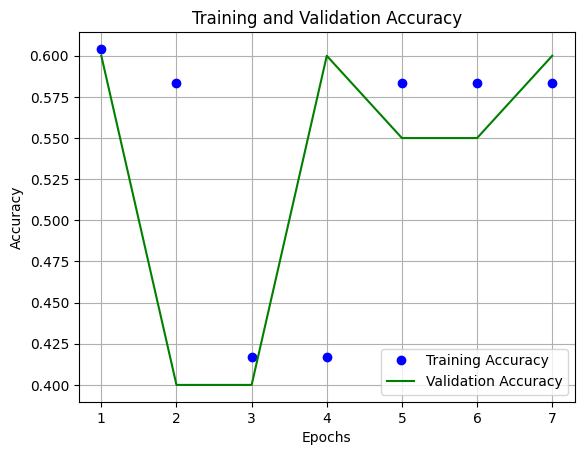

In [ ]:
import matplotlib.pyplot as plt

# Retrieve accuracy history from training
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# Define the number of epochs
epochs = range(1, len(acc) + 1)  # Add 1 to match epoch numbering

# Plot accuracy vs epochs
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


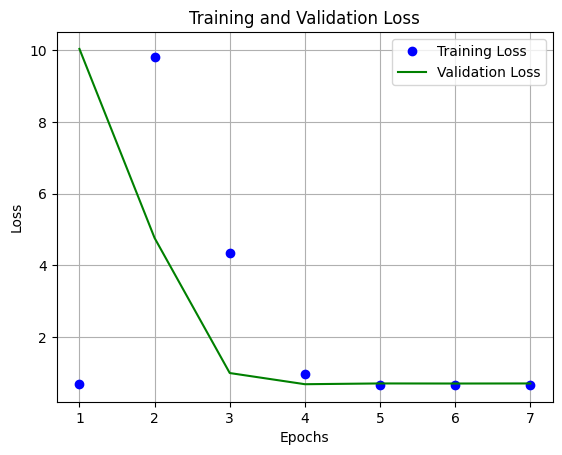

In [ ]:
# Retrieve loss history from training
loss = history1.history['loss']
val_loss = history1.history['val_loss']

# Define the number of epochs
epochs = range(1, len(loss) + 1)  # Add 1 to match epoch numbering

# Plot loss vs epochs
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

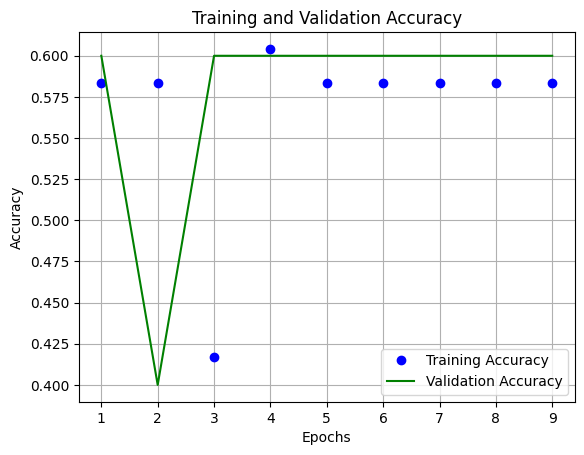

In [ ]:
import matplotlib.pyplot as plt

# Retrieve accuracy history from training
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Define the number of epochs
epochs = range(1, len(acc) + 1)  # Add 1 to match epoch numbering

# Plot accuracy vs epochs
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


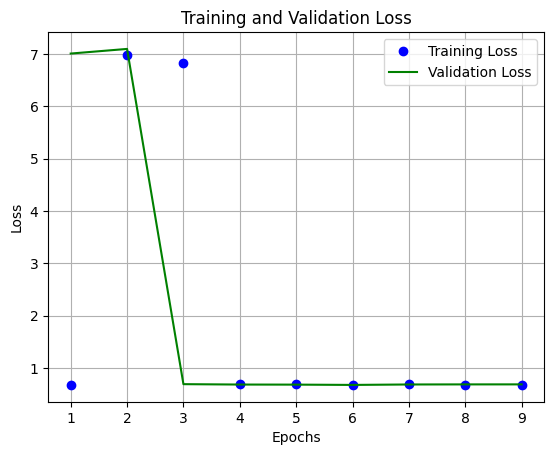

In [ ]:
# Retrieve loss history from training
loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Define the number of epochs
epochs = range(1, len(loss) + 1)  # Add 1 to match epoch numbering

# Plot loss vs epochs
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, ReLU, Softmax

# Define the model
model3 = Sequential()

# Convolutional layers
model3.add(Conv2D(32, (3, 3), padding='same', input_shape=(1292, 32, 3)))
model3.add(ReLU())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(ReLU())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, (3, 3), padding='same'))
model3.add(ReLU())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Global Average Pooling layer
model3.add(GlobalAveragePooling2D())

# Final classification layer with softmax activation
model3.add(Dense(2, activation='softmax'))  # Adjust '10' to the number of genres/classes

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])





In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history3 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=[early_stopping]
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5854 - loss: 0.6830 - val_accuracy: 0.5926 - val_loss: 0.6839
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5854 - loss: 0.6758 - val_accuracy: 0.5926 - val_loss: 0.6864
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5854 - loss: 0.6771 - val_accuracy: 0.5926 - val_loss: 0.6874
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5854 - loss: 0.6794 - val_accuracy: 0.5926 - val_loss: 0.6844


In [ ]:
loss, accuracy = model3.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.5926 - loss: 0.6789
Validation Accuracy: 0.5925925970077515


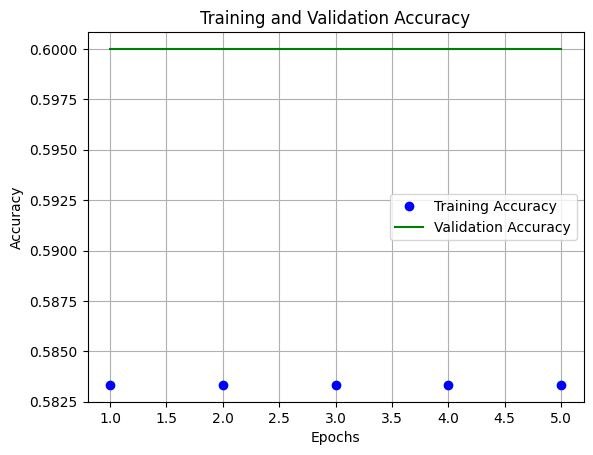

In [ ]:
import matplotlib.pyplot as plt

# Retrieve accuracy history from training
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

# Define the number of epochs
epochs = range(1, len(acc) + 1)  # Add 1 to match epoch numbering

# Plot accuracy vs epochs
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


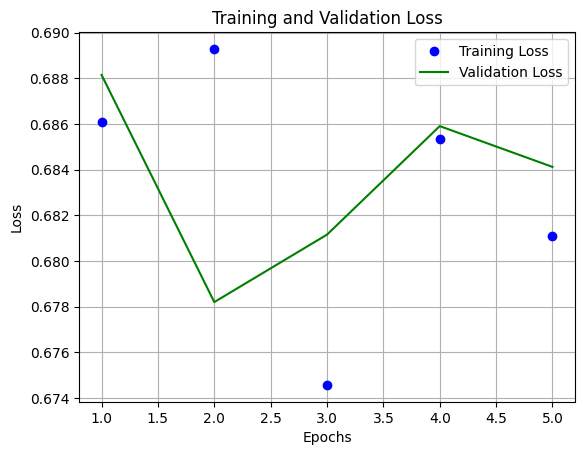

In [ ]:
# Retrieve loss history from training
loss = history3.history['loss']
val_loss = history3.history['val_loss']

# Define the number of epochs
epochs = range(1, len(loss) + 1)  # Add 1 to match epoch numbering

# Plot loss vs epochs
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
"""
IMPLEMENTATION OF CNN WITH BATCH NORMALIZATION
"""
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, ReLU, Softmax, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential
import tensorflow as tf
# Define the model architecture
#Conv2D(64, (3, 3), padding='same', input_shape=(1292, 32, 3), )
model4 = Sequential([
    Conv2D(64, (3, 3), padding='same', input_shape=(1292, 32, 3),kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Input shape adjusted for 3 channels
    MaxPooling2D((3, 3)),
    BatchNormalization(),
    ReLU(),

    Conv2D(32, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    MaxPooling2D((3, 3)),
    BatchNormalization(),
    ReLU(),

    Conv2D(32, (2, 2), padding='same',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    ReLU(),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for 2 classes
])
#learning rate of 0.0001, a batch size of 32, and a total of 10 epochs
# Compile the model
model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy if labels are integers
    metrics=['accuracy']
)

# Print the model summary
model4.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 1292, 32, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 430, 10, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 430, 10, 64)         │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 430, 10, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 430, 10, 32)         │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 143, 3, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 143, 3, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 143, 3, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 143, 3, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 71, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 71, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 71, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │         145,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 170,498 (666.01 KB)

 Trainable params: 170,242 (665.01 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor
    patience=3,              # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)



history4 = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=[early_stopping]
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.4375 - loss: 1.7386 - val_accuracy: 0.4500 - val_loss: 1.5088
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4792 - loss: 1.7713 - val_accuracy: 0.2000 - val_loss: 1.5175
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4375 - loss: 1.8552 - val_accuracy: 0.4500 - val_loss: 1.5084
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step - accuracy: 0.3958 - loss: 1.8520 - val_accuracy: 0.4000 - val_loss: 1.5090
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4375 - loss: 1.8107 - val_accuracy: 0.4500 - val_loss: 1.5056
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3750 - loss: 1.7552 - val_accuracy: 0.5500 - val_loss: 1.5001
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step - accuracy: 0.4167 - loss: 1.7848 - val_accuracy: 0.4500 - val_loss: 1.5122
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3542 - loss: 1.7411 - val_accuracy: 0.2500 - val_loss: 1.5149
Epoch 9/

In [ ]:
# Evaluate the model
loss, accuracy = model4.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.4000 - loss: 1.5073
Validation accuracy: 0.4000000059604645


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Average, Input, Dense

# Input layer
input_layer = Input(shape=(1292, 32, 3))

# Get the output from each model
output1 = model1(input_layer)
output2 = model2(input_layer)
output3 = model3(input_layer)
#output4 = model4(input_layer)

# Average the outputs
average_output = Average()([output1, output2, output3])

# Add a Dense layer for the final prediction (adjust num_classes accordingly)
num_classes = 2
learning_rate = 0.001
final_output = Dense(num_classes, activation='softmax')(average_output)
optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
# Create the ensemble model
ensemble_model1 = Model(inputs=input_layer, outputs=final_output)

# Compile the model (adjust loss and optimizer as needed)
ensemble_model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
ensemble_model1_his = ensemble_model1.fit(train_generator, epochs=10, validation_data=validation_generator)



Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.5833 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5833 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5833 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5833 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5833 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5833 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5833 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5833 - loss: 0.0000e

In [ ]:
print(ensemble_model1.evaluate(validation_generator))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.6000 - loss: 0.0000e+00
[0.0, 0.0, 0.6000000238418579, 0.0, 0.6000000238418579, 0.0, 0.6000000238418579, 0.6000000238418579]


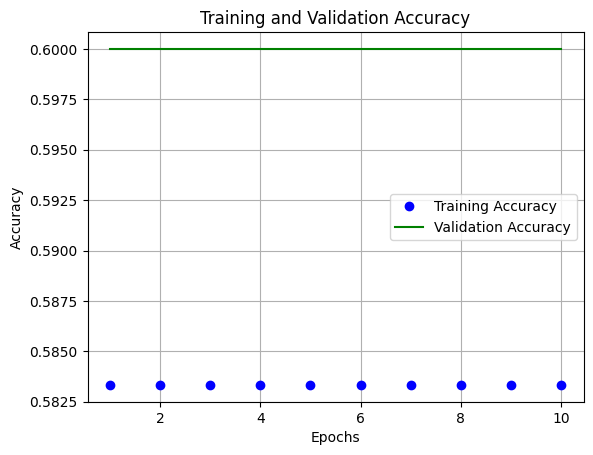

In [ ]:
# prompt: draw the accuracy and loss graphs

import matplotlib.pyplot as plt
# Retrieve accuracy history from training
acc = ensemble_model1_his.history['accuracy']
val_acc = ensemble_model1_his.history['val_accuracy']

# Define the number of epochs
epochs = range(1, len(acc) + 1)  # Add 1 to match epoch numbering

# Plot accuracy vs epochs
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()



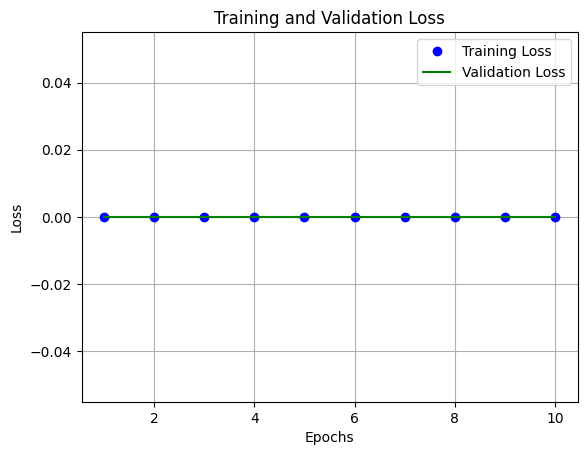

In [ ]:
# Retrieve loss history from training
loss = ensemble_model1_his.history['loss']
val_loss = ensemble_model1_his.history['val_loss']

# Define the number of epochs
epochs = range(1, len(loss) + 1)  # Add 1 to match epoch numbering

# Plot loss vs epochs
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
#need to split the iomages into train and validation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4,
    rotation_range=20,       # Rotate images by up to 20 degrees
    width_shift_range=0.2,   # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    horizontal_flip=True,
    # Flip images horizontally
)


train_generator = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/datasets/Paper_2_implementation_graphs',
    target_size=(1292, 32),
    batch_size=64,
    class_mode='sparse',  # Use 'sparse' if your labels are integers
    subset='training'
)

# Create the validation set
validation_generator = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/datasets/Paper_2_implementation_graphs',
    target_size=(1292, 32),
    batch_size=64,
    class_mode='sparse',
    subset='validation'
)

Found 41 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [ ]:
#STACKING
# Hypothetical example (requires additional code for training the meta-model)
base_model_predictions = [model1.predict(validation_generator), model2.predict(validation_generator),model3.predict(validation_generator)]
meta_model_input = tf.concat(base_model_predictions, axis=-1)
meta_model_output = Dense(num_classes, activation='softmax')(meta_model_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
import numpy as np

def extract_data_from_generator(generator):
    X_data = []
    y_data = []
    for batch_x, batch_y in generator:
        X_data.append(batch_x)
        y_data.append(batch_y)
        # Break when you've seen all the data (one epoch)
        if generator.samples <= len(X_data) * generator.batch_size:
            break
    return np.concatenate(X_data), np.concatenate(y_data)

# Extract data from the validation generator (assuming you want to use the validation set as the holdout)
X_holdout, y_holdout = extract_data_from_generator(validation_generator)

# Now you have X_holdout and y_holdout as NumPy arrays

In [ ]:
X_holdout, y_holdout = extract_data_from_generator(validation_generator)

In [ ]:
# Assuming X_holdout and y_holdout are your held-out data
base_model_predictions = [model1.predict(X_holdout), model2.predict(X_holdout),model3.predict(X_holdout),model4.predict(X_holdout)]
meta_model_input = np.concatenate(base_model_predictions, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step


In [ ]:
from sklearn.linear_model import LogisticRegression

# ... (Your code to generate base_model_predictions)

# Flatten the predictions if they are multi-dimensional (e.g., for multi-class classification)
meta_model_input = np.concatenate(base_model_predictions, axis=-1)
meta_model_input = meta_model_input.reshape(meta_model_input.shape[0], -1)

# Create and train the logistic regression meta-model
meta_model = LogisticRegression(


)
history_ensemble_2 = meta_model.fit(meta_model_input, y_holdout)

# Make predictions with the meta-model
final_predictions = meta_model.predict(meta_model_input)

# Evaluate performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_holdout, final_predictions)
print("Accuracy on holdout set:", accuracy)

Accuracy on holdout set: 0.5925925925925926


In [ ]:
print(ensemble_model1.evaluate(validation_generator))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5926 - loss: 0.0000e+00
[0.0, 0.0, 0.5925925970077515, 0.0, 0.5925925970077515, 0.0, 0.5925925970077515, 0.5925925970077515]


In [ ]:
# Assuming 'history' is the variable storing the training history for a model
plt.plot(history_ensemble_2.history['accuracy'])
plt.plot(history_ensemble_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'history'